### Задание 1

Заказчик попросил провести анализ частоты запросов к сайту по версии [Яндекс.Метрики](https://yandex.ru/support/metrica/general/glossary.html):

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/data/data_stat/yandex-stat-q.csv"

df = pd.read_csv(url)
df.head()

,Поисковая фраза,Поисковая система,Визиты,Посетители,Отказы,Глубина просмотра,Время на сайте
0,Итого и средние,NaN,72394,57803,0.120328,1.298934,00:01:18
1,pycode.ru,Яндекс,2068,1225,0.093810,1.674565,00:01:38
2,холопов алексей васильевич,Яндекс,1240,467,0.082258,1.941129,00:03:53
3,золотое правило дидактики,Яндекс,778,751,0.082262,1.087404,00:00:41
4,золотое правило дидактики я.а коменского,Яндекс,743,724,0.068641,1.044415,00:00:31


**Задача 1.1**: определите статистику встречаемости отдельных слов в поисковых фразах. Это позволит понять тематику данного сайта и настроить показ рекламы.

По условию задачи исходный файл с данными модифицировать нельзя.

In [ ]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [ ]:
morph.parse(df['Поисковая фраза'][3])[0].normal_form

'золотое правило дидактика'

In [ ]:
df['search'] = df['Поисковая фраза'].apply(lambda x: morph.parse(x)[0].normal_form).str.split(" ")
df.search.head()

0                              [итого, и, средний]
1                                      [pycode.ru]
2                      [холопов, алексей, василий]
3                    [золотое, правило, дидактика]
4    [золотое, правило, дидактики, я.а, коменский]
Name: search, dtype: object

In [ ]:
lst = []
for i, j in enumerate(df.search):
    if not i == 0:
        for word in j:
            lst.append(word)
import collections
count = collections.Counter(lst)
sorted(dict(count), key=count.get, reverse=True)
for s in sorted(dict(count), key=count.get, reverse=True):
    if len(s) > 3:
        print(s, count[s])
    elif count[s] < 300:
        break

тезисы 3758
конференция 2487
пример 2246
безопасность 2024
работа 1816
тезис 1766
информационной 1741
научной 1711
конференции 1319
правило 1071
тезисов 949
написать 905
золотое 895
python 892
писать 874
отчет 854
конференцию 798
кейс 780
практике 766
исследовательской 746
коменский 731
информационная 716
принцип 712
безопасности 694
примеры 688
работе 681
практика 669
доклад 663
дидактики 651
образец 633
человек 615
области 611
статья 610
дидактика 570
научных 566
работы 544
анализ 530
доклада 528
какой 507
обучения 491
научные 484
правилом 469
образование 451
такое 442
выступление 440
выступления 434
статьи 429
золотым 413
текст 412
задание 407
холопов 403
студент 401
сухомлинский 398
быть 398
можно 396
метод 389
данных 381
информация 379
производственной 360
написания 360
проблемы 343
этика 331
этый 329
скачать 327
структура 325
тему 318
технология 314
практики 311
правильно 302
научная 299
сухомлинского 293
информационных 291
исследование 290
студента 290


Проведённый анализ показал, что наиболее часто запрашиваемые слова отвечают научной тематике: `тезис`, `конференция`, `исследование`, `пример`, `кейс`, `отчёт`, `образец`, `научный` и тому подобное. Соответственно, нужно настраивать рекламу, которая могла бы заинтересовать научных работников, исследователей и студентов. Например, можно было бы разработать баннеры, описывающие глубокую базу данных и качество источников сайта.

### Задание 2

Заказчик попросил провести анализ поведения пользователей на сайте по версии [Яндекс.Метрики](https://yandex.ru/support/metrica/general/glossary.html):

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/data/data_stat/yandex-stat.csv"

df2 = pd.read_csv(url, 
                  index_col=['Интервал дат визита'], 
                  parse_dates=['Интервал дат визита'])
df2.head()

,Визиты,Посетители,Просмотры,Доля новых посетителей,Отказы,Глубина просмотра,Время на сайте
Интервал дат визита,,,,,,,
Итого и средние,328447,235064,472967,0.997486,0.150542,1.440010,00:01:34
2020-03-08,49,46,55,0.565217,0.244898,1.122449,00:00:52
2020-03-07,152,137,198,0.846715,0.118421,1.302632,00:01:15
2020-03-06,172,160,209,0.812500,0.203488,1.215116,00:01:23
2020-03-05,208,199,266,0.859296,0.125000,1.278846,00:01:07


**Задача 2.1**: определите, каким образом менялось поведение пользователей в зависимости от месяца и года. Постройте графики.

По условию задачи исходный файл с данными модифицировать нельзя.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df2.drop(['Итого и средние'], inplace=True)

In [ ]:
df_visitors = df2.iloc[:, 0:3][::-1]

In [ ]:
df_visitors.head()

,Визиты,Посетители,Просмотры
Интервал дат визита,,,
2017-03-08,374,306,590
2017-03-09,594,525,858
2017-03-10,518,435,746
2017-03-11,366,303,531
2017-03-12,573,500,784


Text(0, 0.5, 'Количество пользователей')

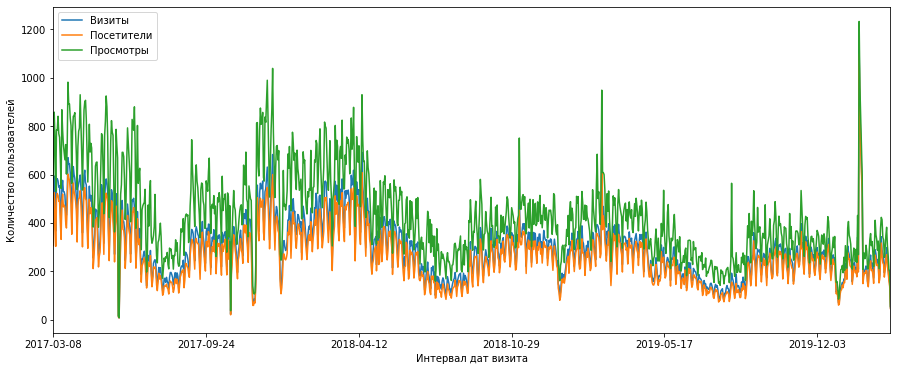

In [ ]:
fig, axs = plt.subplots(figsize=(15, 6)); 
df_visitors.plot(ax=axs); 
axs.set_ylabel("Количество пользователей")

На данном графике с небольшим шагом наглядно видно, что на данный момент разброс посещающих сайт пользователей преуменьшился по сравнению с началом периода. Более устойчивое число пользователей сохранилось к его концу, но иногда бывают "выбросы", когда на сайт заходит более 800 человек по сравнению с постоянной публикой в количестве 200-400 человек. Такую ситуацию можно объяснить дополнительным размещением рекламы сайта на сторонник ресурсах, вследствие чего увеличился процент заинтересованных лиц.

Все показатели двигаются в одном направлении, различие лишь в количестве, что характерно для особенностей группы *Визиты-Посетители-Просмотры*.

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/data/data_stat/yandex-stat.csv"
df_month = pd.read_csv(url, 
                  parse_dates=['Интервал дат визита'])
df_month.head()

,Интервал дат визита,Визиты,Посетители,Просмотры,Доля новых посетителей,Отказы,Глубина просмотра,Время на сайте
0,Итого и средние,328447,235064,472967,0.997486,0.150542,1.440010,00:01:34
1,2020-03-08,49,46,55,0.565217,0.244898,1.122449,00:00:52
2,2020-03-07,152,137,198,0.846715,0.118421,1.302632,00:01:15
3,2020-03-06,172,160,209,0.812500,0.203488,1.215116,00:01:23
4,2020-03-05,208,199,266,0.859296,0.125000,1.278846,00:01:07


In [ ]:
df_month.drop([0], inplace=True)

In [ ]:
df_month['Интервал дат визита'] = pd.to_datetime(df_month['Интервал дат визита'])
df_month['Month'] = df_month['Интервал дат визита'].dt.strftime('%b')
df_month['Year'] = df_month['Интервал дат визита'].dt.year
df_month = df_month.set_index(['Month','Year']).sum(level=[0,1]).reset_index()

In [ ]:
df_month.head()

,Month,Year,Визиты,Посетители,Просмотры,Доля новых посетителей,Отказы,Глубина просмотра
0,Mar,2020,1614,1488,2060,6.426150,1.416046,10.082479
1,Feb,2020,6573,5999,8738,24.873669,4.674628,38.586017
2,Jan,2020,9187,8663,11231,27.189448,4.304140,39.826698
3,Dec,2019,7237,6709,9071,26.880363,5.464908,38.991681
4,Nov,2019,7952,7335,10262,25.960123,4.920811,38.840455


In [ ]:
year_visitors = df_month.groupby(['Year'])['Визиты', 'Посетители', 'Просмотры'].sum()

In [ ]:
year_visitors

,Визиты,Посетители,Просмотры
Year,,,
2017,106809,94432,161165
2018,116493,102818,166791
2019,87771,79063,122982
2020,17374,16150,22029


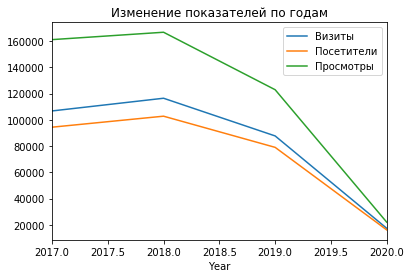

In [ ]:
year_visitors.plot(title='Изменение показателей по годам')

Группировка по годам даёт более наглядное представление о состоянии популярности сайта. График с нисходящим трендом иллюстрирует её постепенный спад с течением времени. Объективно судить о динамике посещаемости сайта можно будет лишь имея данные на конец 2020 года.

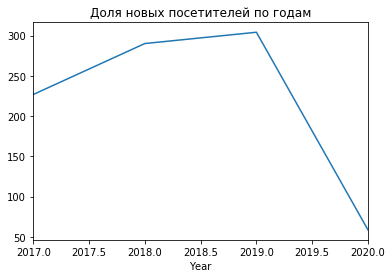

In [ ]:
df_month.groupby(['Year'])['Доля новых посетителей'].sum().plot(title='Доля новых посетителей по годам')

Доля новых посетителей с каждым годом росла до 2019 года, а потом произошёл спад (к началу 2020 года).

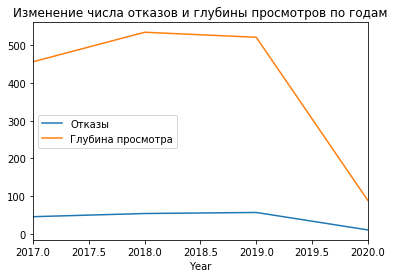

In [ ]:
df_month.groupby(['Year'])['Отказы', 'Глубина просмотра'].sum().plot(title='Изменение числа отказов и глубины просмотров по годам')

Отказы остаются примерно на одном уровне на протяжении всего периода, а вот глубина просмотра (по аналогии с долей новых посетителей) с 2017 по 2019 года немного выросла, а после начала идти на убыль.

In [ ]:
monthly = df_month.iloc[::-1]

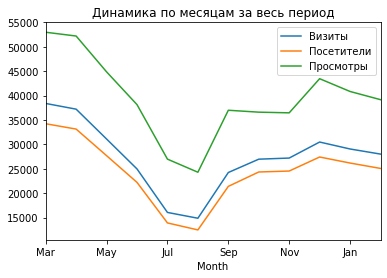

In [ ]:
monthly.groupby(['Month'], sort=False)['Визиты', 'Посетители', 'Просмотры'].sum().plot(title='Динамика по месяцам за весь период')

Для того, чтобы отследить какую-либо сезонную тенденцию посещения сайта, можно сгруппировать показатели по месяцам. По графику мы видим, что наиболее популярен сайт в конец весны и в декабрь-январь. Если сайт представляет собой собрание научных материалов (из предыдущего задания), тогда очевидно, почему именно в эти месяцы у него наибольший приток просмотров: студенты сдают сессии, а выпускники пишут выпускные работы.

### Задание 3

В этом задании Вам предстоит выполнить роль аналитика данных в области образования.

Заказчик (руководство вуза) предоставил обезличенные данные с баллами ЕГЭ студентов (`stud_spisok_ege.csv`) и сведения о баллах за контрольные работы (`stud_spisok_ball.csv`).

Анализ этих данных позволит руководству вуза принимать обоснованные решения по повышению качества процесса обучения и выстраивать персональные образовательные маршруты (построить рекомендательную систему на основе искусственного интеллекта).

По условию задания исходные файлы с данными модифицировать нельзя.

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/data/data_stud/stud_spisok_ege.csv"

df_ege = pd.read_csv(url, sep=';')
df_ege.head()

,stud_kod,predmet_name,ball,year,svid_status
0,50095,Русский язык,76,2013,Действительно
1,50095,Английский язык,94,2013,Действительно
2,50095,Математика,56,2013,Действительно
3,50095,Обществознание,70,2013,Действительно
4,50104,Русский язык,72,2013,Действительно


- `stud_kod` - идентификатор студента
- `predmet_name` - имя предмета
- `ball` - балл
- `year` - год сдачи
- `svid_status` - статус свидетельства о сдаче ЕГЭ

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/data/data_stud/stud_spisok_ball.csv"

df_works = pd.read_csv(url, sep=';')
df_works.head()

,stud_kod,uch_plan_kod,predmet_name,ball,ts,cd_nomer,semestr,cd_type_name,uch_plan_punkt_kod
0,8,1,История,25,25-дек-11,1,1,Эссе,255
1,8,1,История,30,25-дек-11,2,1,Презентация,255
2,8,1,История,45,NaN,3,1,Аналитическая работа,255
3,8,1,Философия,15,30-апр-15,2,1,Реферат,293
4,8,1,Философия,18,30-апр-15,1,1,Аналитическая работа,293


- `stud_kod` - идентификатор студента 
- `uch_plan_kod` - внутренний код учебного плана
- `predmet_name` - имя дисциплины по учебному плану
- `ball` - балл за контрольную работу
- `ts` - время, когда оценка внесена в систему
- `cd_nomer` - номер контрольной работы, если их несколько за семестр
- `semestr` - семестр
- `cd_type_name` - вид контрольной работы
- `uch_plan_punkt_kod` - идентификатор учебного плана

**Задача 3.1**: определите, всего сколько студентов представлено в наборе данных.

In [ ]:
df_ege.stud_kod.value_counts()

489343    11
47277     11
477292    10
300427    10
510099     9
          ..
305619     3
309721     3
303586     3
511597     3
56429      3
Name: stud_kod, Length: 3001, dtype: int64

In [ ]:
df_works.stud_kod.value_counts()

415     288
104     279
1587    279
1160    278
1041    261
       ... 
1610    131
1305    127
776     115
2682     76
1758     70
Name: stud_kod, Length: 285, dtype: int64

Предоставленные данные содержат следующую информацию:
* Баллы ЕГЭ **3001** уникальных студентов на основании идентификатора студента
* Работы по различным дисциплинам и баллы **285** уникальных студентов на основании идентификатора студента

**Задача 3.2**: определите по данным ЕГЭ те предметы, которые чаще всего сдают абитуренты в этом вузе. 

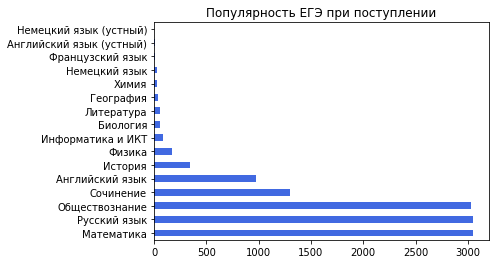

In [ ]:
df_ege.predmet_name.value_counts().plot(kind='barh', title='Популярность ЕГЭ при поступлении', color='royalblue')

В данный университет студенты чаще всего принимаются со сданными экзамеными по *математике, русскому языку* и *обществознанию*. С таким набором в ВУЗЕ могут быть представлены, скорее всего, следующие самые распространённые специальности:
* экономика
* социология
* менеджмент
* туризм и сервис
* управление персоналом

**Задача 3.3**: определите средние, минимальные и максимальные баллы ЕГЭ по отдельным предметам.

In [ ]:
df_ege = df_ege[df_ege.predmet_name	!= 'Сочинение']

In [ ]:
df_ege.groupby(['predmet_name'])['ball'].aggregate(['mean','min', 'max'])

,mean,min,max
predmet_name,,,
Английский язык,69.949640,0,100
Английский язык (устный),0.000000,0,0
Биология,55.557377,0,93
География,64.333333,37,85
Информатика и ИКТ,62.481928,0,94
История,59.945402,0,100
Литература,63.283333,0,87
Математика,64.135454,0,100
Немецкий язык,66.285714,23,90


Средние, минимальные и максимальные баллы ЕГЭ по отдельным предметам представлены в таблице. Для анализа были удалены баллы по сочинениям, потому что за него при поступлении обычно дают 1-5 баллов, и это портит статистику. Тем не менее мы видим, что в колонке **min** слишком много нулевых значений. Обычно такое случается редко, потому что как минимум 1 балл каждый способен набрать при сдаче ЕГЭ. Попробуем удалить нулевые показатели, допустив, что они отражают своеобразное отсутствие информации.

In [ ]:
df_ege_new = df_ege[df_ege.ball != 0]

In [ ]:
df_ege_new.groupby(['predmet_name'])['ball'].aggregate(['mean','min', 'max'])

,mean,min,max
predmet_name,,,
Английский язык,70.383661,22,100
Биология,58.431034,36,93
География,64.333333,37,85
Информатика и ИКТ,65.645570,35,94
История,62.834337,32,100
Литература,64.355932,35,87
Математика,64.516331,20,100
Немецкий язык,66.285714,23,90
Обществознание,71.524439,40,100


Вот так таблица выглядит более репрезентативно.

**Задача 3.4**: определите годы с максимальными и минимальными показателями ЕГЭ.

In [ ]:
years_max = df_ege_new[df_ege_new.ball == df_ege_new.ball.max()]
years_max.groupby(['year', 'predmet_name'])['ball'].mean()

year  predmet_name   
2012  Обществознание     100
      Русский язык       100
2013  Английский язык    100
      Математика         100
      Обществознание     100
      Русский язык       100
2014  Русский язык       100
2015  Русский язык       100
2016  Математика         100
      Обществознание     100
      Русский язык       100
2017  История            100
      Русский язык       100
Name: ball, dtype: int64

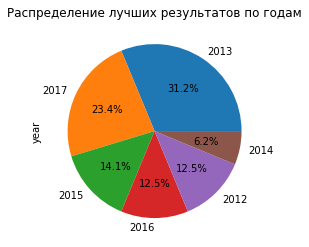

In [ ]:
years_max.year.value_counts().plot(kind='pie', title='Распределение лучших результатов по годам', autopct='%1.1f%%')

Больше всего максимальных результатов было в 2013 году.

In [ ]:
years_min = df_ege_new[df_ege_new.ball == df_ege_new.ball.min()]

In [ ]:
years_min.groupby(['year', 'predmet_name'])['ball'].mean()

year  predmet_name
2014  Математика      20
Name: ball, dtype: int64

Минимальное значение (20 баллов по математике) имело место в 2014 году.

**Задача 3.5**: определите наиболее часто встречающийся вид контрольной работы в вузе.

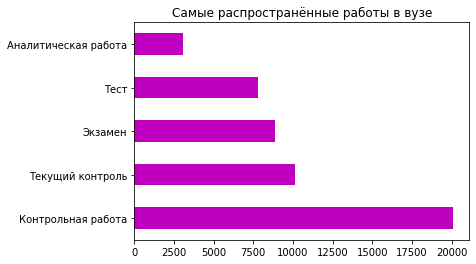

In [ ]:
df_works.cd_type_name.value_counts().head().plot(kind='barh', title='Самые распространённые работы в вузе', color='m')

Наиболее часто встречающийся вид контрольной работы в вузе — это, собственно, **контрольная работа**.

**Задача 3.6**: определите дисциплину(ы), вызвавшую наибольшие сложности у студентов. 

Это позволит усилить подготовку по данным дисциплинам через внедрение факультативных занятий. 

In [ ]:
df_works.ball = df_works.ball.str.replace(',', '.').apply(lambda x: float(x))

In [ ]:
print(df_works.ball.max())
print(df_works.ball.min())

95.0
0.0


Для начала посмотрим, какое ранжирование по баллам существует в вузе. Далее допустим, что все работы оцениваются примерно одинаково: **от 0 до 95 баллов**.

In [ ]:
df_problems = df_works[df_works.ball <= 28]

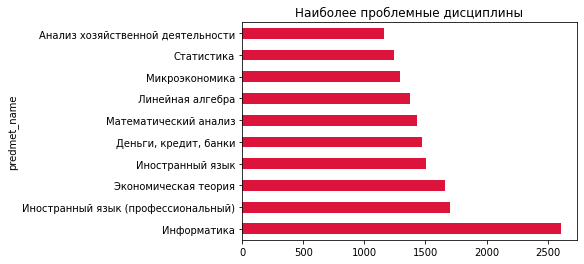

In [ ]:
df_problems.groupby('predmet_name')['ball'].count().nlargest(10).plot(kind='barh', title='Наиболее проблемные дисциплины', color='crimson')

Если допустить, что работы, оцениваемые в менее 28 баллов (около 30%), сигнализируют о наличии проблем с дисциплиной, то наибольшее число работ с такими баллами в вузе по **информатике**.

**Задача 3.7**: определите отстающих студентов (претендентов на отчисление). 

In [ ]:
df_works['year'] = df_works['ts'].str.split("-")

In [ ]:
df_works['year'] = df_works['year'].str.get(2)

In [ ]:
df_works.year.value_counts()

15    21343
13    16273
14    15285
12     9862
11     2106
16      427
17       35
Name: year, dtype: int64

In [ ]:
desperate = df_works[(df_works.ball <= 15) & 
                     ((df_works.year == '16') | (df_works.year == '17'))]

Будем считать отстающими студентами тех, у кого за **последние два года** больше всего работ с оценков **менее 15 баллов**. Ранние годы не учитываем, так как к последнему году студенты могли исправить большинство плохих оценок или же лучше выучить проблемную дисциплину, а отстающие в ранних годах уже скорее всего были отчислены. 

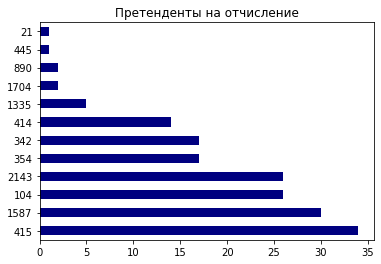

In [ ]:
desperate.stud_kod.value_counts().plot(kind='barh', title='Претенденты на отчисление', color='navy')

График показывает, что больше 10 работ с низкими оценками у студентов с идентификаторами: `415`, `1587`, `104`, `2143`, `354`, `342`, `414`.

**Задача 3.8**: определите семестр и год, наиболее сложные для отдельных (выбранных) студентов. 

In [ ]:
selection = df_works.head(1500)

In [ ]:
selection.stud_kod.value_counts()

55    121
70    114
21    112
9      94
8      92
73     52
87     41
Name: stud_kod, dtype: int64

Я отрезала первые 1500 значений от целой dataframe `df_works`, в результате получилось **7 уникальных студентов**. Далее определим, какой семестр и год был наиболее сложным для каждого. Для этого допустим следующее:
* чем больше у студента работ с баллом меньше 15, тем труднее ему давался период

In [ ]:
selection = selection[selection.ball <= 15]

In [ ]:
selection.groupby(['stud_kod', 'semestr', 'year'])['cd_type_name'].count().nlargest(26)

stud_kod  semestr  year
55        5        13      20
          6        14      19
87        2        15      18
55        2        15      17
70        2        15      17
          4        13      17
8         2        15      16
          5        13      16
21        4        13      16
          6        14      16
55        4        13      16
70        6        14      16
8         6        14      15
9         2        15      15
          5        14      15
21        2        15      15
8         7        15      13
9         6        14      13
8         4        13      12
21        5        14      12
9         4        13      11
21        7        15      11
55        7        14      11
70        7        15      11
87        1        15      11
55        1        15      10
Name: cd_type_name, dtype: int64

С помощью сводной таблицы можно увидеть, какой семестр и год являлся наиболее сложным для студента `/stud_kod/`:
* *5 семестр (2013 год)* для студента с идентификатором 55 (*6 семестр 2014 года* также был дня него примерно на одном уровне сложности)
* *2 семестр (2015 год)* для студента с идентификатором `87`
* *2 семестр (2015 год)* для студента с идентификатором `55`
* *2 семестр (2015 год)* и *4 семестр (2013 год)* для студента с идентификатором `70` были одинаково сложными
* 2 семестр (2015 год) и 5 семестр (2013 год)* для студента с идентификатором `8` были одинаково сложными
* *4 семестр (2013 год)* и *6 семестр (2014 год)* для студента с идентификатором `21` были одинаково сложными
* *2 семестр (2015 год)* и *5 семестр (2014 год)* для студента с идентификатором `9` были одинаково сложными
* студента с идентификатором `73` в таблице, показывающей больше 10 низко оцененных работ, не обнаружилось, соответственно, можно сделать вывод, что этот студент показывал высокие результаты на протяжении всего периода обучения

**Задача 3.9**: определите, можно ли провести анализ интересов отдельных (выбранных) студентов, исходя из баллов по контрольным работам. 

Эта информация позволит в будущем рекомендовать студентам подходящие магистерские программы.

In [ ]:
selection2 = df_works.head(5000)

In [ ]:
selection2.drop(selection2.columns[[1, 4, 5, 8]], axis='columns', inplace=True)

In [ ]:
interested = selection2[selection2.ball >= 50]

In [ ]:
interested.stud_kod.value_counts()

73     14
94      8
119     6
165     6
144     6
142     5
93      5
88      4
164     4
9       3
21      3
8       3
100     3
175     2
154     2
87      2
104     1
70      1
140     1
103     1
55      1
Name: stud_kod, dtype: int64

По аналогии с предыдущим пунктом, мы будем исследовать работы студентов, получивших 50 и более баллов за одну работу. Такая оценка может свидетельствовать о высокой заинтересованности студента в предмете.

In [ ]:
grouped = interested.groupby('stud_kod')['predmet_name', 'ball']

Для начала посмотрим, чем больше всего заинтересованы первые два студента из выборки с наибольшим количеством высокооцененных работ. Кстати, это тот самый студент `73`, который не вошёл в список отстающих.

In [ ]:
grouped.get_group(73)

,predmet_name,ball
1225,Управленческий учет и учет персонала - 1,50.0
1239,Управление персоналом организации - 1,64.0
1253,Математические методы и модели в принятии решений,50.0
1255,Социология - 1,58.0
1274,Основы безопасности труда,50.0
1293,Политология,50.0
1295,Учебная фирма,75.0
1314,Адаптация персонала,50.0
1317,Квалификация и компетенции персонала,50.0
1350,Регламентация и нормирование труда,50.0


Студента с идентификатором `73` определённо интересует сфера **управления человеческими ресурсами**, и он показывает отличные результаты по разнообразным дисциплинам, связанным с персоналом.

In [ ]:
grouped.get_group(94)

,predmet_name,ball
2193,Безопасность жизнедеятельности,60.0
2238,Учебная практика,90.0
2256,Политология,67.0
2300,МСФО,50.0
2307,Бухгалтерский учет в торговле,50.0
2311,Бухгалтерский учет в строительных организациях,70.0
2315,Аудит,70.0
2329,Учет ВЭД,55.0


А студент с идентификатором `94` двигается в сторону бухгалтеского учёта и анализа деятельности организации.

In [ ]:
interested.groupby(['stud_kod', 'predmet_name']).groups

{(8, 'Политология'): Int64Index([142], dtype='int64'),
 (8, 'Учебная практика'): Int64Index([124], dtype='int64'),
 (8, 'Экономическая история'): Int64Index([64], dtype='int64'),
 (9, 'Безопасность жизнедеятельности'): Int64Index([329], dtype='int64'),
 (9, 'Политология'): Int64Index([395], dtype='int64'),
 (9, 'Учебная практика'): Int64Index([374], dtype='int64'),
 (21, 'Качество управленческого труда'): Int64Index([679], dtype='int64'),
 (21, 'Учебная практика'): Int64Index([598], dtype='int64'),
 (21,
  'Экономика социально-трудовых отношений'): Int64Index([661], dtype='int64'),
 (55, 'Учебная практика'): Int64Index([822], dtype='int64'),
 (70, 'Учебная практика'): Int64Index([1047], dtype='int64'),
 (73, 'Адаптация персонала'): Int64Index([1314], dtype='int64'),
 (73,
  'Инновационный менеджмент в управлении персоналом'): Int64Index([1370], dtype='int64'),
 (73,
  'Квалификация и компетенции персонала'): Int64Index([1317], dtype='int64'),
 (73,
  'Математические методы и модели в п

Данная сводка по всем студентам из выборки показывает, что большинство студентов заинтересованы в финансовых дисциплинах. Для таких студентов можно рекомендовать программы магистратуры, готовящие квалифицированных специалистов в области *бухгалтерского учета, прикладного экономического анализа* и *аудита*.

**Задача 3.10**: Предложите решение, каким образом по представленным данным отследить динамику успеваемости отдельных (выбранных) студентов?

In [ ]:
selection3 = df_works.head(2000)

In [ ]:
selection3.stud_kod.value_counts()

73    258
8     250
87    240
70    228
88    226
9     225
55    224
21    224
93    125
Name: stud_kod, dtype: int64

In [ ]:
selection3.drop(selection3.columns[[1, 2, 4, 5, 6, 7, 8]], axis='columns', inplace=True)

In [ ]:
selection3.head()

,stud_kod,ball,year
0,8,25.0,11
1,8,30.0,11
2,8,45.0,NaN
3,8,15.0,15
4,8,18.0,15


In [ ]:
progress = selection3.groupby(['year', 'stud_kod'])['ball'].sum()

In [ ]:
progress

year  stud_kod
11    8            214.000
      9            223.000
      21           147.000
      55           216.000
      70           205.000
      73           472.000
      87           130.000
      88           184.000
      93           225.000
12    8            911.620
      9            765.450
      21           664.200
      55           603.650
      70           756.090
      73          1409.510
      87           779.530
      88           991.580
      93           696.860
13    8           1461.640
      9           1088.550
      21          1052.380
      55           979.510
      70          1139.910
      73          1942.500
      87          1205.490
      88          1233.565
      93           912.850
14    8            764.500
      9           1146.000
      21           998.330
      55           763.500
      70           785.800
      73          1858.500
      87          1054.400
      88          1334.000
15    8           1400.768
      9      

Text(0, 0.5, 'Суммарные оценки студентов')

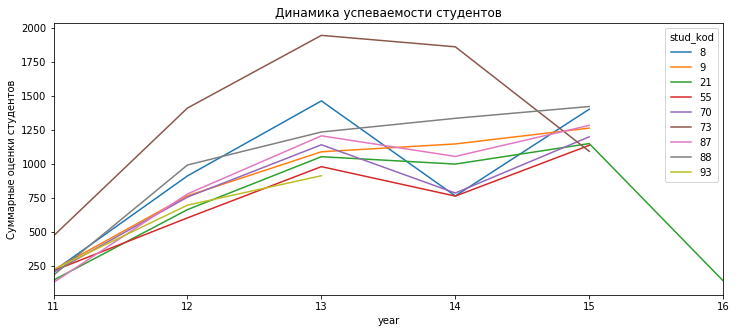

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(12, 5)); 
progress.unstack().plot(ax=axs, title='Динамика успеваемости студентов'); 
axs.set_ylabel("Суммарные оценки студентов")

На данном графике хорошо отслеживается успеваемость студентов. Некоторые даже двигаются в одном направлении (`8`, `70`, `55` и `88`, `9`, `21`). Знакомый нам студент `73` больше всего занимался учёбой первые 2 года, поднимая свою успеваемость, а с 2013 года немного подзабросил её. Успеваемость большинства студентов из выборки демонстрирует положительный тренд.